In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Median Filter

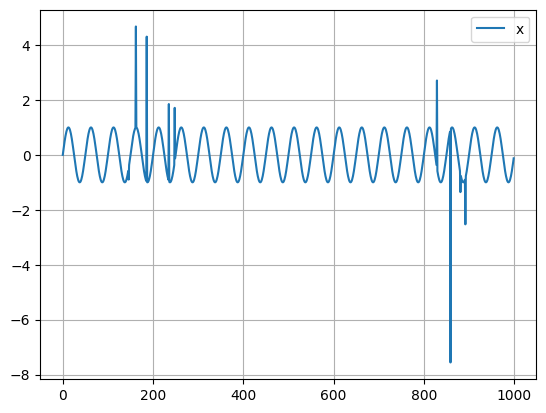

In [16]:
Fs = 1000 # Hz
t = np.arange(0., 1., 1/Fs)
f0 = 20
x = np.sin(2 * np.pi * f0 * t)

# **** add impulsive noise in random places of signal ****
np.random.seed(4321)
n_impulsive_noise = 9
n_noise_position = np.random.randint(0, len(x), n_impulsive_noise)
noise_std = 5.0
n_noise_value = np.random.randn(n_impulsive_noise) * noise_std
x[n_noise_position] += n_noise_value

plt.plot(x, label='x')
plt.legend(); plt.grid(); plt.show()

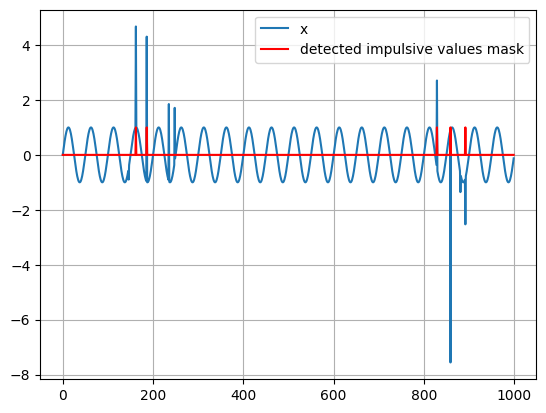

In [40]:
threshold = 2.0
mask = (np.abs(x) > threshold) # detected impulsive values mask

plt.plot(x, label='x')
plt.plot(mask, 'r', label='detected impulsive values mask')
plt.legend(); plt.grid(); plt.show()

In [41]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print('Mask:\n', a < 4)
print('nonzero (True) indices : \n', np.nonzero(a < 4))
# help(np.nonzero)

Mask:
 [ True  True  True False False False False False False]
nonzero (True) indices : 
 (array([0, 1, 2], dtype=int64),)


In [42]:
threshold = 2.0
mask = (np.abs(x) > threshold) # detected impulsive values mask
np.nonzero(mask)

(array([162, 186, 829, 859, 892], dtype=int64),)

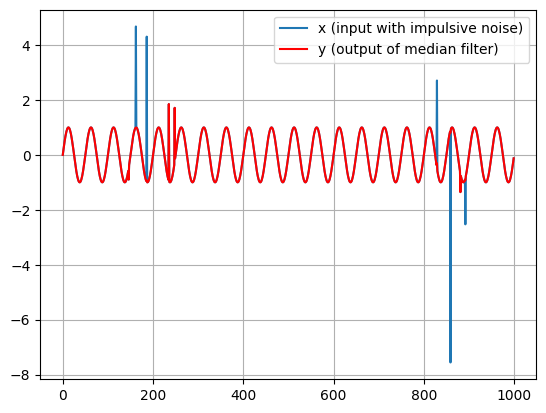

In [45]:
threshold = 2.0
kernel_size = 5

mask = (np.abs(x) > threshold) # detected impulsive values mask
impulsive_noise_idx = np.nonzero(mask)[0]

x_len = len(x)
y = x.copy()
for i in impulsive_noise_idx:
    kernel = x[max(i-kernel_size//2, 0) : min(i + kernel_size//2, x_len)]
    kernel_median = np.median(kernel)
    y[i] = kernel_median

plt.plot(x, label='x (input with impulsive noise)')
plt.plot(y, 'r', label='y (output of median filter)')
plt.legend(); plt.grid(); plt.show()

In [25]:
def median_filter(x, threshold, kernel_size=3):
    mask = (np.abs(x) > threshold) # detected impulsive values mask
    impulsive_noise_idx = np.nonzero(mask)[0]
    
    x_len = len(x)
    y = x.copy()
    for i in impulsive_noise_idx:
        kernel = x[max(i-kernel_size//2, 0) : min(i + kernel_size//2, x_len)]
        kernel_median = np.median(kernel)
        y[i] = kernel_median
    
    return y

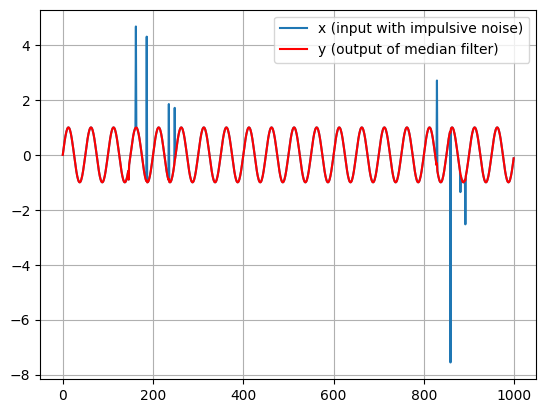

In [50]:
y = median_filter(x, threshold=1.0, kernel_size=5)

plt.plot(x, label='x (input with impulsive noise)')
plt.plot(y, 'r', label='y (output of median filter)')
plt.legend(); plt.grid(); plt.show()

# Gaussian Mixture

In [14]:
var1 = 5.0
var2 = 100.0

n = 200 # length
p1 = 0.5
mask1 = (np.random.rand(n) <= p1)
n1 = np.sum(mask1)
print(n1)

105


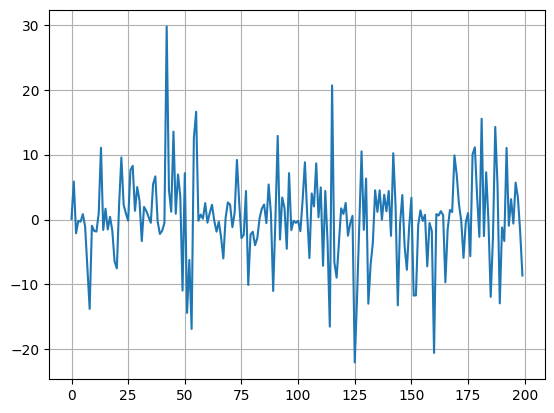

In [86]:
var1 = 5.0
var2 = 100.0

n = 200 # length
p1 = 0.5
mask1 = (np.random.rand(n) <= p1)
n1 = np.sum(mask1)

noise = np.zeros(n)
noise[mask1] = np.random.randn(n1) * np.sqrt(var1)
noise[~ mask1] = np.random.randn(n - n1) * np.sqrt(var2)

plt.plot(noise)
plt.grid()

In [5]:
def gaussian_mixture(length, var1, var2, p1=0.5):
    mask1 = (np.random.rand(length) <= p1)
    n1 = np.sum(mask1)

    noise = np.zeros(length)
    noise[mask1] = np.random.randn(n1) * np.sqrt(var1)
    noise[~ mask1] = np.random.randn(length - n1) * np.sqrt(var2)
    
    return noise


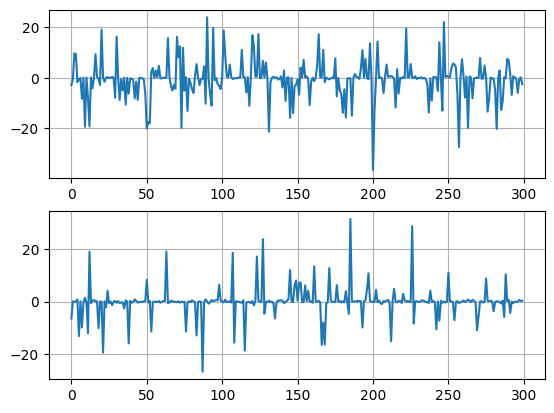

In [13]:
plt.subplot(2, 1, 1); plt.grid()
plt.plot(gaussian_mixture(300, 0.1, 100.0, 0.5))
plt.subplot(2, 1, 2); plt.grid()
plt.plot(gaussian_mixture(300, 0.1, 100.0, 0.8))
plt.show()

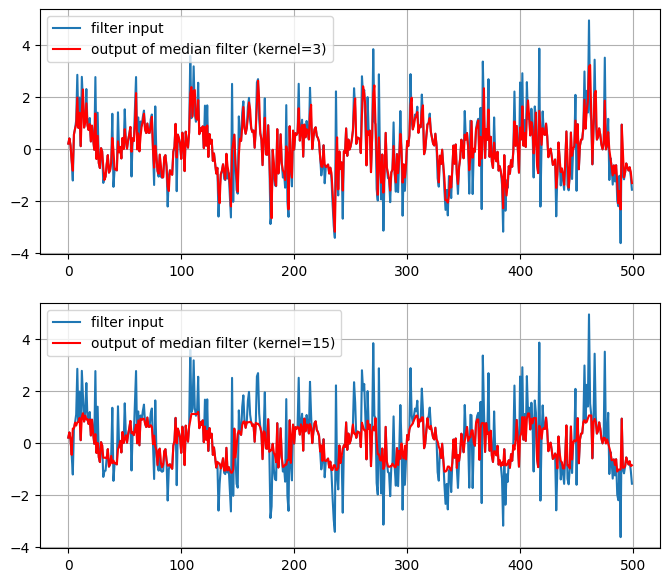

In [52]:
Fs = 1000 # Hz
t = np.arange(0., 0.5, 1/Fs)
f0 = 20
x = np.sin(2 * np.pi * f0 * t)

noise = gaussian_mixture(len(x), 0.1, 2.0, 0.5)
y = x + noise

z1 = median_filter(y, 1.0, kernel_size=3)
z2 = median_filter(y, 1.0, kernel_size=15)

plt.figure(figsize=(8, 7))
plt.subplot(2, 1, 1); plt.grid()
plt.plot(y, label='filter input')
plt.plot(z1, 'r', label='output of median filter (kernel=3)')
plt.legend()
plt.subplot(2, 1, 2); plt.grid()
plt.plot(y, label='filter input')
plt.plot(z2, 'r', label='output of median filter (kernel=15)')
plt.legend()
plt.show()